In [25]:
import sys
import glob
import os
import io
import logging
from pprint import pprint
import gmake
from gmake.model import clouds_morph
from gmake.model import clouds_kin
from gmake.model import clouds_tosky
from gmake.model import clouds_fromobj
from gmake.discretize import xy_mapper
from gmake.evaluate import uv_chisq
from astropy.coordinates import SkyCoord
from gmake.tests.test_cloudlet import *
import astropy.units as u
import numpy as np

import socket
if  'hypersion' or 'mini' in socket.gethostname() :
    os.chdir(gmake.__demo__+'/../gmake/tests/results/mockup/uv_nelder')
print(sys.version)

print(socket.gethostname())
print(os.getcwd())
print(gmake.__version__)
print(gmake.__email__)
print(gmake.__demo__)
inpfile=gmake.__demo__+'/../gmake/tests/data/mockup_basic_opt_ab.inp'
logfile=''
#gmake.logger_config()
#gmake.logger_status()
#import pprint
#pprint.pprint(logging.Logger.manager.loggerDict)
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
outdir=inp_dct['general']['outdir']
gmake.logger_config(logfile=outdir+'/gmake.log',loglevel='DEBUG',logfilelevel='DEBUG')
gmake.logger_status()
%reload_ext line_profiler
%reload_ext memory_profiler

#%time dat_dct=gmake.read_data(inp_dct,fill_mask=True,fill_error=True)
#%prun dat_dct=gmake.read_data(inp_dct,fill_mask=True,fill_error=True)
#%lprun -f gmake.read_data dat_dct=gmake.read_data(inp_dct,fill_mask=True,fill_error=True)
#%memit dat_dct=gmake.read_data(inp_dct)
#%mprun -f gmake.read_data dat_dct=gmake.read_data(inp_dct)

3.7.6 (default, Dec 23 2019, 11:26:59) 
[Clang 11.0.0 (clang-1100.0.33.16)]
Ruis-Mac-mini.local
/Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/tests/results/mockup/uv_nelder
0.2.dev1
rx.astro@gmail.com
/Users/Rui/Resilio/Workspace/projects/GMaKE/gmake
<Logger gmake (DEBUG)>
[<FileHandler /Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/tests/results/mockup/uv_nelder/gmake.log (DEBUG)>, <StreamHandler stderr (DEBUG)>]


In [26]:
inp_dct=gmake.read_inp(inpfile)
dat_dct=gmake.read_data(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
#pprint(dat_dct)
#pprint(inp_dct)
#pprint(dat_dct)

read data (may take some time..)
loading: ../../../data/mockup_basic_withnoise.ms/dm.image.fits to 
data@../../../data/mockup_basic_withnoise.ms/dm.image.fits header@../../../data/mockup_basic_withnoise.ms/dm.image.fits
(1, 120, 256, 256)30.000137329101562 Mibyte
loading: ../../../data/mockup_basic_withnoise.ms/dm.psf.fits to 
psf@../../../data/mockup_basic_withnoise.ms/dm.image.fits
(1, 120, 256, 256)30.000137329101562 Mibyte
--------------------------------------------------------------------------------
--- dat_dct size 50.71 Kibyte ---
--- took 0.09305  seconds ---


In [34]:
#pprint(np.sum(dat_dct['weight@../../../data/mockup_basic_withnoise.ms']==0))
inp_dct=gmake.read_inp(inpfile)
#inp_dct=gmake.inp_validate(inp_dct)
#mod_dct=gmake.inp2mod(inp_dct)
#gmake.clouds_fill(mod_dct)
#print(mod_dct)
#models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)

fit_dct,models=gmake.opt_setup(inp_dct,dat_dct,initial_model=True)
#pprint(models)
#models['error@../../data/mockup_basic_withnoise.ms/dm.image.fits']
#pprint(fit_dct)
#pprint(models)
#%lprun -f gmake.opt_iterate gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models,resume=False)
gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
optimizer: lmfit-leastsq
optimizing parameters:
----------------------------------------------------------------------------------------------------
index    name    unit    start    lo_limit    up_limit    scale
 0   vsini@basics       250.00     km / s  (    100.00     km / s,     300.00     km / s )    150.00     km / s 
 1   sbProf[1]@co21      3.00      kpc  (     1.00      kpc,      30.00     kpc )     27.00     kpc 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ndim:    2
outdir:  ./
npar ->2
ndata->190680
--- save to: .//fit.h5
chisq->25236.33878302513
lnl  ->1232848.5768739723
one trial                                          : 0.84136  seconds
max_iteration:40
 
Running Optimizer: lmfit-leastsq
>>.//chisq_chain.h5
 
set OpenMP threading: 12
[<Quantity 250. km / s>, <Quantity 3. kpc>]
[<Quantity 250. km / s>, <Quantity 3. 

(190680,)
186472.69617428808


[<Quantity 250. km / s>, <Quantity 3. kpc>]


(190680,)
186475.49356020466


[<Quantity 254.4639035 km / s>, <Quantity 3. kpc>]


(190680,)
186477.25599563232


[<Quantity 250. km / s>, <Quantity 3.82983332 kpc>]


(190680,)
186461.40682853607


[<Quantity 235.48458402 km / s>, <Quantity 5.95719721 kpc>]


(190680,)
186323.55698642155


[<Quantity 238.85192837 km / s>, <Quantity 5.95719721 kpc>]


(190680,)
186199.88882361035


[<Quantity 235.48458402 km / s>, <Quantity 6.76534082 kpc>]


(190680,)
186201.7961090735


[<Quantity 218.93930833 km / s>, <Quantity 6.80501266 kpc>]


(190680,)
186196.6185941198


[<Quantity 220.80671124 km / s>, <Quantity 6.80501266 kpc>]


(190680,)
186186.14034366675


[<Quantity 218.93930833 km / s>, <Quantity 7.56867255 kpc>]


(190680,)
186186.8557272028


[<Quantity 216.46502243 km / s>, <Quantity 7.01517117 kpc>]


(190680,)
186189.86028760744


[<Quantity 218.09415544 km / s>, <Quantity 7.01517117 kpc>]


(190680,)
186185.8595995776


[<Quantity 216.46502243 km / s>, <Quantity 7.76624906 kpc>]


(190680,)
186186.25179732806


[<Quantity 215.21868118 km / s>, <Quantity 7.24499502 kpc>]


(190680,)
186188.37812850453


[<Quantity 216.72685488 km / s>, <Quantity 7.24499502 kpc>]


(190680,)
186185.0793577307


[<Quantity 215.21868118 km / s>, <Quantity 7.98169231 kpc>]


(190680,)
186186.79814160237


[<Quantity 209.8080804 km / s>, <Quantity 7.01994683 kpc>]


(190680,)
186195.42144659118


[<Quantity 210.78524219 km / s>, <Quantity 7.01994683 kpc>]


(190680,)
186181.18474800675


[<Quantity 209.8080804 km / s>, <Quantity 7.77073237 kpc>]


(190680,)
186182.7248935566


[<Quantity 205.99413213 km / s>, <Quantity 7.08898039 kpc>]


(190680,)
186185.34981844565


[<Quantity 206.59271502 km / s>, <Quantity 7.08898039 kpc>]


(190680,)
186179.21098484017


[<Quantity 205.99413213 km / s>, <Quantity 7.8355087 kpc>]


(190680,)
186181.04950775346


[<Quantity 203.38737251 km / s>, <Quantity 7.29701824 kpc>]


(190680,)
186184.98212182682


[<Quantity 204.29982347 km / s>, <Quantity 7.17157862 kpc>]


(190680,)
186181.2437105152


[<Quantity 205.39086973 km / s>, <Quantity 7.10162628 kpc>]


(190680,)
186181.07187572817


[<Quantity 205.87483579 km / s>, <Quantity 7.0903757 kpc>]


(190680,)
186181.761478608


[<Quantity 205.97925085 km / s>, <Quantity 7.08912778 kpc>]


(190680,)
186180.25242191012


[<Quantity 205.99263552 km / s>, <Quantity 7.08899488 kpc>]


(190680,)
186182.6116222049


[<Quantity 205.99398238 km / s>, <Quantity 7.08898184 kpc>]


(190680,)
186181.41585330057


[<Quantity 205.99411715 km / s>, <Quantity 7.08898054 kpc>]


(190680,)
186180.34195091724


[<Quantity 205.99413213 km / s>, <Quantity 7.08898039 kpc>]


(190680,)
186180.9581366503


--- save to: .//chisq_chain.h5


(190680,)
186180.66010729075
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 190680
    # variables        = 2
    chi-square         = 186180.660
    reduced chi-square = 0.97641395
    Akaike info crit   = -4549.27387
    Bayesian info crit = -4528.95716
[[Variables]]
    p_1:  205.994132 +/- 1.35150562 (0.66%) (init = 250)
    p_2:  7.08898039 +/- 0.29595231 (4.17%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(p_1, p_2) = -0.290


In [43]:
#pprint(np.sum(dat_dct['weight@../../../data/mockup_basic_withnoise.ms']==0))
inp_dct=gmake.read_inp(inpfile)
#inp_dct=gmake.inp_validate(inp_dct)
#mod_dct=gmake.inp2mod(inp_dct)
#gmake.clouds_fill(mod_dct)
#print(mod_dct)
#models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)

fit_dct,models=gmake.opt_setup(inp_dct,dat_dct,initial_model=True)
#pprint(models)
#models['error@../../data/mockup_basic_withnoise.ms/dm.image.fits']
#pprint(fit_dct)
#pprint(models)
%lprun -f gmake.evaluate.calc_wdev gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models,resume=False)
#gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
optimizer: lmfit-leastsq
optimizing parameters:
----------------------------------------------------------------------------------------------------
index    name    unit    start    lo_limit    up_limit    scale
 0   vsini@basics       250.00     km / s  (    100.00     km / s,     300.00     km / s )    150.00     km / s 
 1   sbProf[1]@co21      3.00      kpc  (     1.00      kpc,      30.00     kpc )     27.00     kpc 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ndim:    2
outdir:  ./
npar ->2
ndata->190680
--- save to: .//fit.h5
chisq->25236.213086911837
lnl  ->1232848.639722029
one trial                                          : 0.85796  seconds
max_iteration:40
 
Running Optimizer: lmfit-leastsq
>>.//chisq_chain.h5
 
set OpenMP threading: 12
[<Quantity 250. km / s>, <Quantity 3. kpc>]
[<Quantity 250. km / s>, <Quantity 3. 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 190680
    # variables        = 2
    chi-square         = 186179.800
    reduced chi-square = 0.97640944
    Akaike info crit   = -4550.15518
    Bayesian info crit = -4529.83848
[[Variables]]
    p_1:  197.535161 +/- 0.51329617 (0.26%) (init = 250)
    p_2:  7.50666565 +/- 0.32441302 (4.32%) (init = 3)


Timer unit: 1e-06 s

Total time: 17.4216 s
File: /Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/evaluate.py
Function: calc_wdev at line 203

Line #      Hits         Time  Per Hit   % Time  Line Contents
   203                                           def calc_wdev(p,
   204                                                         fit_dct=None,inp_dct=None,
   205                                                         models=None,blobs=None,
   206                                                         savemodel=None):
   207                                               """
   208                                               this might be slightly slower than calc_chisq due to memory usage to hold entire models
   209                                               it's not ideal for parallel calculation as the models are saved in the same object "models"
   210                                               """
   211        20         30.0      1.5      0.0      theta=[]    # wit

In [64]:
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
gmake.clouds_fill(mod_dct)
#print(mod_dct)
#models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)

#fit_dct,models=gmake.opt_setup(inp_dct,dat_dct,initial_model=False)
#pprint(models)
#models['error@../../data/mockup_basic_withnoise.ms/dm.image.fits']
#pprint(fit_dct)
#pprint(models)
#%lprun -f gmake.opt_iterate gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models,resume=False)
#gmake.opt_iterate(fit_dct,inp_dct,dat_dct,models)

In [65]:
#p_chisq=gmake.hdf2dct(fit_dct['outfolder']+'/chisq_chain.h5')
#p_chisq['blobs']['pars'].shape
#print(models['sample@../../data/mockup_basic_withnoise.ms/dm.image.fits'].shape)
#print(models['data-sp@../../data/mockup_basic_withnoise.ms/dm.image.fits'].shape)
#print(gmake.xy_chisq([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models))
%timeit gmake.xy_chisq([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models)


545 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
#print(gmake.evaluate.xy_chisq0([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models))
%timeit gmake.evaluate.xy_chisq0([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models)
#%lprun -f gmake.evaluate.xy_chisq0 gmake.evaluate.xy_chisq0([mod_dct['co21']],'../../data/mockup_basic_withnoise.ms/dm.image.fits',dat_dct,models)

542 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
#import emcee
#h5name=fit_dct['outfolder']+'/emcee_chain.h5'
#backend = emcee.backends.HDFBackend(h5name)
#print(backend)
#p_amoeba=gmake.hdf2dct(fit_dct['outfolder']+'/amoeba_chain.h5')
#import gmake
gmake.analyze.opt_analyze(inpfile,export=False,burnin=180)
#p_chisq=gmake.hdf2dct(fit_dct['outfolder']+'/chisq_chain.h5')
#p_chisq['result'].var_names
#pprint(p_amoeba)
#p_lmfit=gmake.hdf2dct(inp_dct['general']['outdir']+'/lmfit_chain.h5')
#from lmfit import report_fit
#report_fit(p_lmfit['lmfit_result'])
#result=p_lmfit['lmfit_result']
#result.flatchain
#help(result)

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 8;
tau: [21.47239717 21.71853599]
tau: [21.47239717 21.71853599]
select burnin:   180
chain shape  :   (400, 40, 2)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
>>>  vsini@basics:
 median(sigma) = 209.54       -33.41       -16.96       19.48        38.24       
 median(ptile) = 209.54       176.13       192.57       229.02       247.78      
 start(iscale) = 250.00      /150.00      
 mode          = 211.71      
>>>  sbProf[1]@co21:
 median(sigma) = 6.95           -1.00          -0.54          0.59           1.25          
 median(ptile) = 6.95           5.94           6.41           7.54           8.19          
 start(iscale) = 3.00          /27.00         
 mode          = 7.02          
------------------------------------------------------------------------------------------
analyzing

In [18]:
help(backend.reset)

Help on method reset in module emcee.backends.hdf:

reset(nwalkers, ndim) method of emcee.backends.hdf.HDFBackend instance
    Clear the state of the chain and empty the backend
    
    Args:
        nwakers (int): The size of the ensemble
        ndim (int): The number of dimensions



In [40]:
import gmake
from astropy.io import fits
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
gmake.clouds_fill(mod_dct)
#pprint(mod_dct)
models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)
#pprint(models)
#header=models['header@../../../../examples/data/gn20/vla/AC974.100408.ms']
objs=[mod_dct['co21']]
#psf=models['psf@../../../../examples/data/gn20/vla/AC974.100408.ms']


header=models['header@test_data.fits']
psf=models['psf@test_data.fits']
#%lprun -f gmake.discretize.mapper cube,scube=gmake.discretize.mapper(objs,header,psf=psf)
#%timeit cube,scube=gmake.discretize.mapper(objs,header,psf=psf)

#fits.writeto('out_model.fits',cube,header,overwrite=True)
#fits.writeto('out_smodel.fits',scube,header,overwrite=True)
#fits.writeto('out_psf.fits',psf,header,overwrite=True)
#%lprun -f gmake.uv_chisq fit_dct=gmake.fit_setup(inp_dct,dat_dct,initial_model=True)


#%lprun -f gmake.log_likelihood gmake.fit_iterate(fit_dct,inp_dct,dat_dct)
#gmake.fit_analyze(inpfile,export=True)
%lprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#%mprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)

KeyError: 'header@test_data.fits'

In [135]:
import gmake
from astropy.io import fits
inp_dct=gmake.read_inp(inpfile)
inp_dct=gmake.inp_validate(inp_dct)
mod_dct=gmake.inp2mod(inp_dct)
gmake.clouds_fill(mod_dct)

models=gmake.model_setup(gmake.inp2mod(inp_dct),dat_dct)
header=models['header@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvdata=dat_dct['data@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvw=dat_dct['uvw@../../../../examples/data/gn20/vla/AC974.100408.ms']
phasecenter=dat_dct['phasecenter@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvweight=dat_dct['weight@../../../../examples/data/gn20/vla/AC974.100408.ms']
uvflag=dat_dct['flag@../../../../examples/data/gn20/vla/AC974.100408.ms']
objs=[mod_dct['co21']]

%lprun -f gmake.discretize.uv_mapper vis=gmake.discretize.uv_mapper(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#%lprun -f gmake.uv_chisq fit_dct=gmake.fit_setup(inp_dct,dat_dct,initial_model=True)
#%lprun -f gmake.log_likelihood gmake.fit_iterate(fit_dct,inp_dct,dat_dct)
#gmake.fit_analyze(inpfile,export=True)
#%lprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#%timeit chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)
#print(chi2)
#%mprun -f uv_chisq chi2=uv_chisq(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)

#vis=gmake.discretize.uv_mapper(objs,header,uvdata,uvw,phasecenter,uvweight,uvflag)


Timer unit: 1e-06 s

Total time: 0.392153 s
File: /Users/Rui/Resilio/Workspace/projects/GMaKE/gmake/discretizer.py
Function: uv_mapper at line 369

Line #      Hits         Time  Per Hit   % Time  Line Contents
   369                                           def uv_mapper(objs,header,
   370                                                         uvdata,uvw,phasecenter,uvweight,uvflag):
   371                                               """
   372                                               map mutiple component into one header and calculate chisq
   373                                               
   374                                               models:    a list of model to be mapped into the visibility model for the chisq calculation
   375                                               header:    pesudo fits header
   376                                               uv...:     visibility data 
   377                                               
   378                  

In [144]:
print(vis.dtype)

complex64


In [44]:
mod_dct['co21']['clouds_loc'].get_xyz(xyz_axis=-1).shape

(2000000, 3)

In [18]:
uvw.shape

(136555, 3)

In [35]:
%timeit uvdata0=uvdata[:,2]

208 ns ± 1.59 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
uvdata0=uvdata[:,2]
uvdata0.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [29]:
u = np.ones (100, dtype=complex)

In [30]:
u[::2]

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j])

In [31]:
uvdata_new=uvdata.transpose().copy()

In [33]:
print(uvdata_new.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [34]:
%timeit uvdata[2,:]

211 ns ± 1.44 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [41]:
uvdata0

array([-0.26760855-0.17498447j,  0.02340355+0.09439102j,
       -0.10140443+0.12782678j, ...,  0.06768706-0.37996066j,
       -0.19639248-0.23046204j,  0.0222325 -0.3234178j ], dtype=complex64)

In [42]:
uvdata0+=1

In [43]:
uvdata0

array([0.7323915-0.17498447j, 1.0234035+0.09439102j,
       0.8985956+0.12782678j, ..., 1.067687 -0.37996066j,
       0.8036075-0.23046204j, 1.0222325-0.3234178j ], dtype=complex64)

In [46]:
uvdata[:,2]

array([0.7323915-0.17498447j, 1.0234035+0.09439102j,
       0.8985956+0.12782678j, ..., 1.067687 -0.37996066j,
       0.8036075-0.23046204j, 1.0222325-0.3234178j ], dtype=complex64)

In [50]:
uvdata.shape

(136555, 128)

In [51]:
import bottleneck as bn

In [61]:
%timeit test=bn.nansum(uvdata)

53.1 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
%timeit test=np.nansum(uvdata)
test=np.sum(uvdata)

52.7 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
import numexpr as ne

In [63]:
%timeit test=ne.evaluate('sum(a)',local_dict={'a':uvdata})

27.8 ms ± 744 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
bn.nansum(uvdata)

(136179.36-905.8241j)

In [60]:
ne.evaluate('sum(a)',local_dict={'a':uvdata})

array(136179.25953069-905.82455157j)

In [69]:
uvdata.shape

(136555, 128)

In [72]:
a=uvdata[:,2]
b=uvflag[:,2]
c=uvweight

In [77]:
%timeit ne.evaluate('sum( ( (a.real)**2+(a.imag)**2 ) * (~b*c) )',local_dict={'a':a,'b':b,'c':c})

1.17 ms ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [79]:
%timeit np.sum( ( (a.real)**2+(a.imag)**2 ) * (~b*c) )

815 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
h5name='emcee_chain.h5-2020-0224-163856'

In [9]:
import emcee
reader = emcee.backends.HDFBackend(h5name,read_only=True)

In [10]:
sampler0=reader

/Users/Rui/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: UserWarning: Attempting to set identical bottom == top == 207.0036540522829 results in singular transformations; automatically expanding.
  import sys



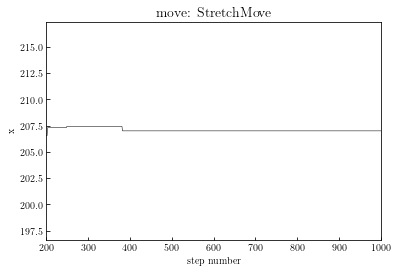

In [28]:
%matplotlib inline
plt.plot(sampler0.get_chain()[:, 1, 0], "k", lw=0.5)
plt.xlim(200, 1000)
samp=sampler0.get_chain()[:, 1, 0]
vmin=np.min(samp[400:1000])
vmax=np.max(samp[400:1000])
plt.ylim(vmin, vmax)
plt.title("move: StretchMove", fontsize=14)
plt.xlabel("step number")
plt.ylabel("x");
#print("Autocorrelation time: {0:.2f} steps".format(sampler0.get_autocorr_time()[0]))